# Подготовка аудио файлов

Копирование файлов с Git на локальный диск виртуальной машины - вставка ссылки с гитхаба: 

In [1]:
!git clone https://github.com/smartsinovich/Simple-Audio-Recognition.git

Cloning into 'Simple-Audio-Recognition'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 42 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (42/42), done.


In [2]:
!pip install soundfile

In [3]:
!pip install pydub



---



Number of channels 1
Sample width 2
Frame rate. 22050
Number of frames 18433
parameters: _wave_params(nchannels=1, sampwidth=2, framerate=22050, nframes=18433, comptype='NONE', compname='not compressed')
ee_down1.wav
22050
[0 0 0 ... 0 0 0]
sound durantion =  0.8359637188208616


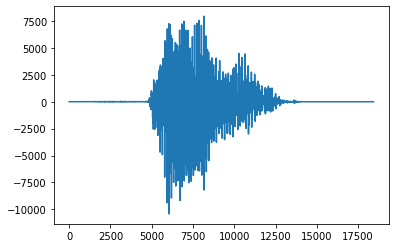

Number of channels 1
Sample width 2
Frame rate. 16000
Number of frames 16000
parameters: _wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=16000, comptype='NONE', compname='not compressed')
mod_ee_down1.wav
16000
[0 0 0 ... 0 0 0]
sound durantion =  1.0


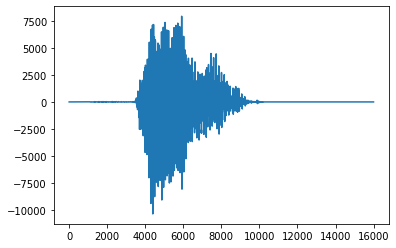

In [6]:
import os
import numpy as np
import keras
import math
from keras.models import load_model
from scipy.io import wavfile
from scipy.fftpack import dct
from scipy.io import wavfile
import scipy.io.wavfile
import matplotlib.pyplot as plt

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
sample_file ='ee_down1.wav'
dir_path = '/content/Simple-Audio-Recognition/MyRawAudio'
dir_path_mod = '/content/Simple-Audio-Recognition/MyRawAudio/My_Commands'

#изменяем кол-во каналов до 1 и framerate до 16000, длину сокращаем или дополняем молчанием до 1 сек
from pydub import silence, AudioSegment
audio = AudioSegment.from_file(dir_path + '/' + sample_file, format="wav")


def preprocess_audio(filename):
    # Trim or pad audio segment to 10000ms
    padding = AudioSegment.silent(duration=1000)
    segment = AudioSegment.from_wav(filename)[:1000]
    segment = padding.overlay(segment)
    
    # Set frame rate to 16000
    segment = segment.set_frame_rate(16000).set_channels(1)

    # Export segment as wav
    modified_file = "mod_" + sample_file
    segment.export(dir_path_mod + '/' + modified_file, format='wav')
    
    
preprocess_audio(dir_path + '/' + sample_file)
modified_file = "mod_" + sample_file


import wave
obj = wave.open(dir_path +'/' + sample_file,'r')
print( "Number of channels",obj.getnchannels())
print ( "Sample width",obj.getsampwidth())
print ( "Frame rate.",obj.getframerate())
print ("Number of frames",obj.getnframes())
print ( "parameters:",obj.getparams())
obj.close()
rate, data = scipy.io.wavfile.read(dir_path + '/' + sample_file)
d = obj.getnframes()/obj.getframerate()
print(sample_file)
print(rate)
print(data)
print("sound durantion = ", d)
plt.plot(data)
plt.show()


obj = wave.open(dir_path_mod +'/' + modified_file,'r')
print( "Number of channels",obj.getnchannels())
print ( "Sample width",obj.getsampwidth())
print ( "Frame rate.",obj.getframerate())
print ("Number of frames",obj.getnframes())
print ( "parameters:",obj.getparams())
obj.close()
rate, data = scipy.io.wavfile.read(dir_path_mod + '/' + modified_file)
d = obj.getnframes()/obj.getframerate()
print(modified_file)
print(rate)
print(data)
print("sound durantion = ", d)
plt.plot(data)
plt.show()




---



---

